# Random Forest

## Part I: Research Question

### A1. Research Question

Can we use random forest and the available data to estimate customer's tenure and identify indicators that can predict it?

### A2. One Goal of the Data Analysis

One goal is to generate a random forest machine learning model to predict customer tenure and identify which features the stakeholders can focus on when trying to predict customer tenure.

## Part II: Method Justification

### B1. How the Chosen Prediction Method Analyzes the Data Set and Expected Outcomes

The chosen prediction method, random forest, uses an average of many decision tree models, in other words an ensemble of the decision tree models (Bruce et al., 2020). Hence, this method is refered to as an ensemble method (Larose & Larose, 2019). It is aggregating multiple models and averaging them all before arriving at its final estimate.  The estimate generated is a bagged estimate, forged by bootstrap aggregation (Bruce et al, 2020). This prediction method is more accurate than simply using one decision tree model (Bruce et al., 2020).  Although this method is slower than a single decision tree model, it has a lower risk of overfitting (Vishalmendekarhere, 2021). The expected outcome is that the random forest model created will be able to predict tenure with an acceptable accuracy level and identify features that are key to that prediction.

### B2. One Assumption of the Chosen Prediction Method

Random forest is a non-parametric model, meaning it assumes no formal distributions (Vishalmendekarhere, 2021). A benefit of this assumption is that the model is able to process multi-model, data with outliers, and even skewed datasets (Vishalmendekarhere, 2021). 

### B3. Chosen Packages and Libraries and their use in the Analysis

Python will be used for its readability and the availability of packages and libraries for use in data analysis (Larose & Larose, 2019). The libraries and packages chosen include Pandas, Numpy, Scikit-Learn, Matplotlib, and Seaborn. Pandas will be used to import data (Vallisneri, 2018). Utilizing the Matplotlib's plot function is good at creating plots to visualize the data (Larose & Larose, 2019). Numpy will be utilized to create object arrays. Seaborn will be used for visualizations. Matplotlib's pyplot will be used to create visualizations such as scatterplots. Scikit-Learn packages will be used for splitting, accuracy score metrics, calculating R2, and mean absolute error. In addition, SciKit Learn's Random Forest Regressor will be used, along with GridSearchCV to determine the optimal parameter values.

## Part III: Data Preparation

### C1. One Data Preprocessing Goal

The goals of data preparation include identification of data types, detection of missing values, reviewing values of categorical variables, and detection of outliers. Additionally, categorical variables will be checked for spelling errors. Categorical variables will be converted to numeric for ease during the data analysis process.

### C2. Relevant variables in Initial Data Set and their Classifications

The churn data contains information on 10,000 customers across various variables.  Unique customer identifiers, customers' geographic location information, customers' jobs were excluded from analysis.

The target variable, Churn, was included in the analysis along with 34 other features: Children, Age, Income, Marital, Gender, MonthlyCharge, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, Bandwidth_GB_Year, and the survey data Items 1 through 8.

The target variable, Churn, is a binary categorical variable. That is, two possible values for the variable are Yes and No. Of the 10,000 records, 7,350 of then have 'No' for this variable, that is the represent a subscriber that did not churn, or leave the company. Of those 10,000, 2,650 of them did churn. 

Among the continuous variables, Children, Income and Yearly_equip_failure and Contacts had positively skewed distributions. Email and Outage_sec_perweek had normal distributions. Age had a uniform distribution. Tenure and Bandwidth_GB_Year had bimodal distributions.

The income ranged from a minimum of approximately \\$350, to a maximum of approximately \\$260,000, with an average mean income of approximately \\$40,000.  The number of children per customer ranged from 0 to 10, with the average being 2.  

The customer ages ranged from 18 to 89, with an average age of around 53 years of age. The tenure, or number of months the customer has been with the provider ranged from 1 month to 72 months, with a mean tenure of approximately 35 months.

The monthly charge ranged from approximately \\$80 to \\$290 per month. The average monthly charge was approximately \\$172 per month. While most customers had phone service, the use of streaming tv and movies was split amongst the customers, with half using the features, and the other half not using them.

Variables: Continuous vs Categorical

   The continuous variables include:
       CaseOrder, Zip, Lat, Lng, Population, Children, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, Bandwith_GB_Year, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8
       
   The categorical variables include:
       Customer_id, Interaction, UID, City, State, County, Area, Timezone, Job, Marital, Gender, Churn, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod.

### C3. Data Preparation Steps and the code for Each Step

After importing the necessary packages and libraries, the raw dataset will be imported.

The .info function will be used to view the column names and datatypes.

The total missing values in each column will be calculated using the isnull().sum() function. If necessary, imputation will be performed to replace the missing values with the appropriate mean, median or mode using the .fillna function.

Univariate and bivariate visualizations will be generated to examine the distributions of the variables. Histograms will be created of the continuous variables to view the distributions. 

To detect outliers, boxplots will be utilized. If necessary to treat outliers, additional analysis will be conducted to determine if the outliers should be removed, retained, excluded or replaced.

Scatterplots will be used to view correlations between variables.

Categorical variables will be assessed for unique values and be encoded for ease during data analysis.

SciKit-Learn's SelectKBest will be used for selection of the variables to improve model accuracy. 

Lastly, the prepared dataset will be extracted.

In [102]:
from platform import python_version
("Python version used during this analysis:", python_version())

('Python version used during this analysis:', '3.8.5')

This version of python continues to support the print() statement, and it will be used in the following analysis.

In [103]:
import numpy as np

import pandas as pd
from pandas import Series, DataFrame

import pylab

import statistics

from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import sklearn
from sklearn import datasets

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score, mean_absolute_error, classification_report 
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print("Done.")

Done.


In [104]:
churn_df=pd.read_csv('Desktop/WGU/D208/churn_clean.csv')
print("Imported.")

Imported.


In [105]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 60)

print("Display size adjusted.")

Display size adjusted.


In [106]:
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [107]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

**Assessing for missing values**

In [108]:
churn_df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

No nulls present.

**Viewing summary statistics**

In [109]:
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


**Removing less meaningful information**

In [110]:
churn_df=churn_df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City',
                                'State','County','Zip','Lat','Lng',
                                'Population','Area','TimeZone','Job', 'Item1','Item2',
                                'Item3','Item4','Item5','Item6','Item7','Item8'])

In [111]:
churn_df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


Reviewing the categorical columns remaining

In [112]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  object 
 4   Gender                10000 non-null  object 
 5   Churn                 10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Techie                10000 non-null  object 
 11  Contract              10000 non-null  object 
 12  Port_modem            10000 non-null  object 
 13  Tablet                10000 non-null  object 
 14  InternetService       10000 non-null  object 
 15  Phone               

Checking the categorical columns for unique values and value counts, using the value counts function

In [113]:
churn_df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [114]:
churn_df.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [115]:
churn_df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

Our target (dependent) variable is binary.

In [116]:
churn_df.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [117]:
churn_df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [118]:
churn_df.Port_modem.value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [119]:
churn_df.Tablet.value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [120]:
churn_df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [121]:
churn_df.Phone.value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [122]:
churn_df.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [123]:
churn_df.OnlineSecurity.value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [124]:
churn_df.OnlineBackup.value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [125]:
churn_df.DeviceProtection.value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [126]:
churn_df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [127]:
churn_df.StreamingTV.value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [128]:
churn_df.StreamingMovies.value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [129]:
churn_df.PaperlessBilling.value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [130]:
churn_df.PaymentMethod.value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

### Visualizations of Distributions of Variables

#### Univariate Statistics

In [131]:
churn_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


Viewing histograms of continuous variables

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Email'}>,
        <AxesSubplot:title={'center':'Contacts'}>],
       [<AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

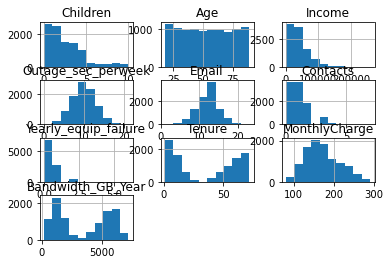

In [132]:
churn_df[['Children','Age','Income','Outage_sec_perweek','Email','Contacts',
          'Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']].hist()

Viewing boxplots of continuous variables

<AxesSubplot:xlabel='Children'>

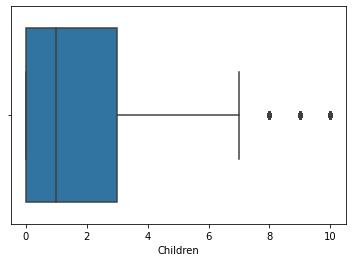

In [133]:
sns.boxplot(x='Children',data=churn_df)

<AxesSubplot:xlabel='Age'>

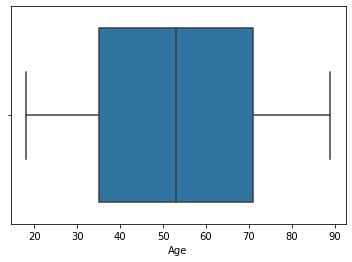

In [134]:
sns.boxplot(x='Age',data=churn_df)

<AxesSubplot:xlabel='Income'>

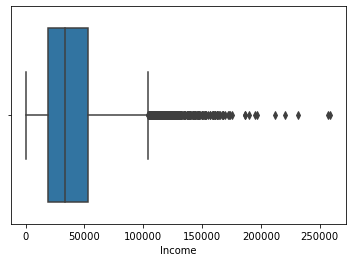

In [135]:
sns.boxplot(x='Income',data=churn_df)

<AxesSubplot:xlabel='Outage_sec_perweek'>

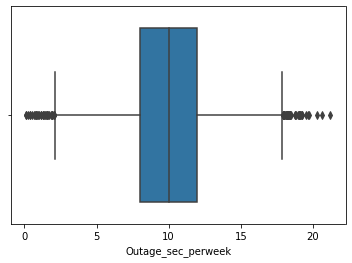

In [136]:
sns.boxplot(x='Outage_sec_perweek',data=churn_df)

<AxesSubplot:xlabel='Email'>

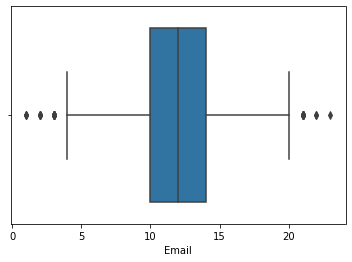

In [137]:
sns.boxplot(x='Email',data=churn_df)

<AxesSubplot:xlabel='Contacts'>

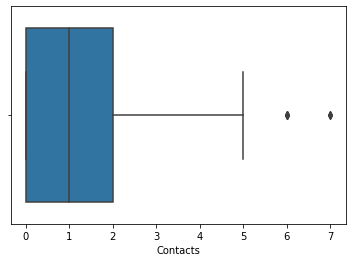

In [138]:
sns.boxplot(x='Contacts',data=churn_df)

<AxesSubplot:xlabel='Yearly_equip_failure'>

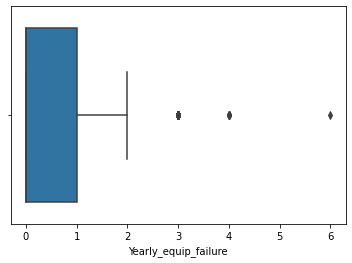

In [139]:
sns.boxplot(x='Yearly_equip_failure',data=churn_df)

<AxesSubplot:xlabel='Tenure'>

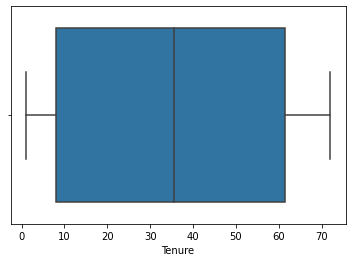

In [140]:
sns.boxplot(x='Tenure',data=churn_df)

<AxesSubplot:xlabel='MonthlyCharge'>

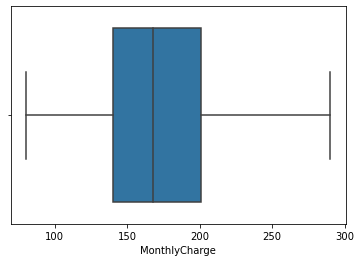

In [141]:
sns.boxplot(x='MonthlyCharge',data=churn_df)

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

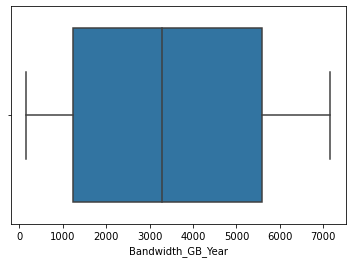

In [142]:
sns.boxplot(x='Bandwidth_GB_Year',data=churn_df)

Viewing bar charts of descriptive variables

<AxesSubplot:xlabel='Marital'>

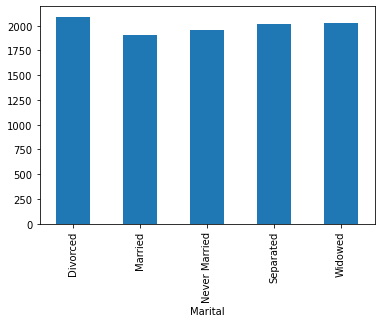

In [143]:
churn_df.groupby('Marital').size().plot.bar()

<AxesSubplot:xlabel='Gender'>

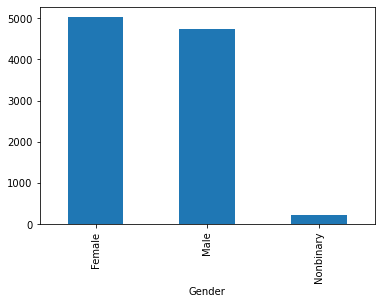

In [144]:
churn_df.groupby('Gender').size().plot.bar()

<AxesSubplot:xlabel='Churn'>

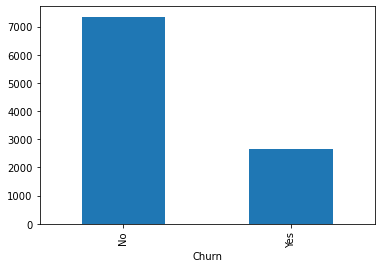

In [145]:
churn_df.groupby('Churn').size().plot.bar()

<AxesSubplot:xlabel='Techie'>

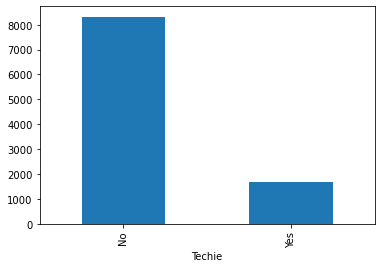

In [146]:
churn_df.groupby('Techie').size().plot.bar()

<AxesSubplot:xlabel='Contract'>

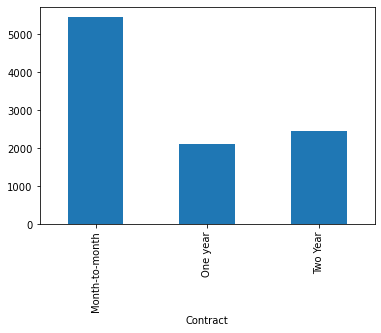

In [147]:
churn_df.groupby('Contract').size().plot.bar()

<AxesSubplot:xlabel='Port_modem'>

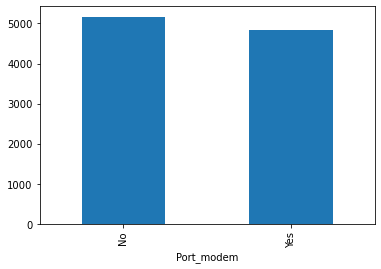

In [148]:
churn_df.groupby('Port_modem').size().plot.bar()

<AxesSubplot:xlabel='Tablet'>

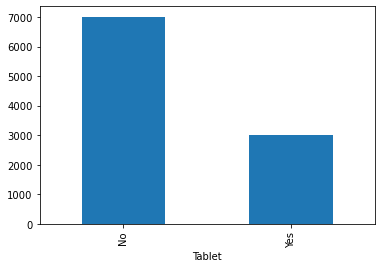

In [149]:
churn_df.groupby('Tablet').size().plot.bar()

<AxesSubplot:xlabel='InternetService'>

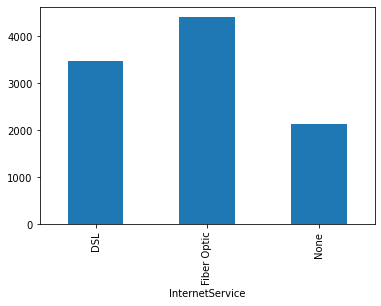

In [150]:
churn_df.groupby('InternetService').size().plot.bar()

<AxesSubplot:xlabel='Phone'>

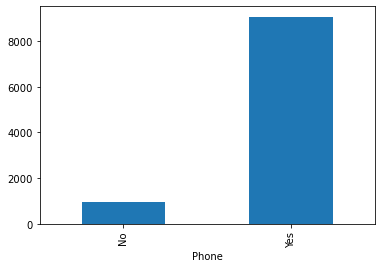

In [151]:
churn_df.groupby('Phone').size().plot.bar()

<AxesSubplot:xlabel='Multiple'>

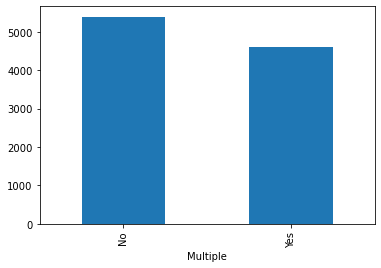

In [152]:
churn_df.groupby('Multiple').size().plot.bar()

<AxesSubplot:xlabel='OnlineSecurity'>

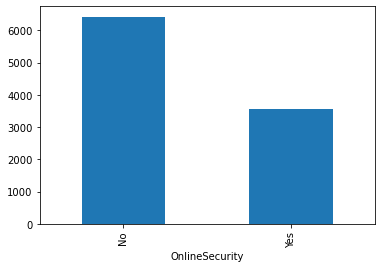

In [153]:
churn_df.groupby('OnlineSecurity').size().plot.bar()

<AxesSubplot:xlabel='OnlineBackup'>

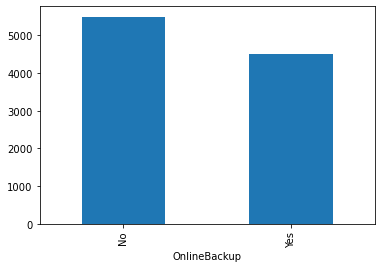

In [154]:
churn_df.groupby('OnlineBackup').size().plot.bar()

<AxesSubplot:xlabel='DeviceProtection'>

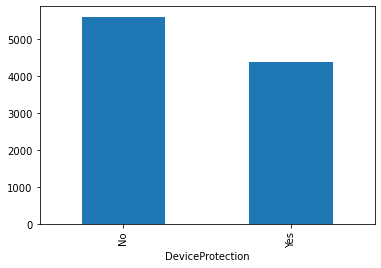

In [155]:
churn_df.groupby('DeviceProtection').size().plot.bar()

<AxesSubplot:xlabel='TechSupport'>

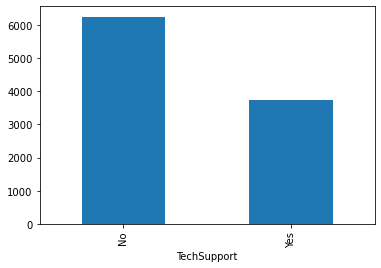

In [156]:
churn_df.groupby('TechSupport').size().plot.bar()

<AxesSubplot:xlabel='StreamingTV'>

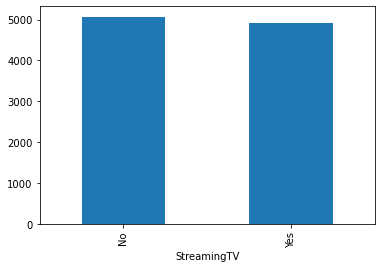

In [157]:
churn_df.groupby('StreamingTV').size().plot.bar()

<AxesSubplot:xlabel='StreamingMovies'>

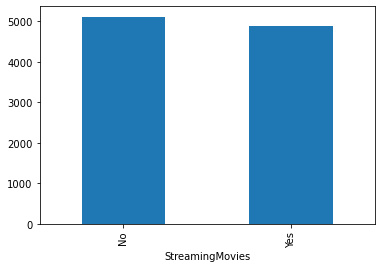

In [158]:
churn_df.groupby('StreamingMovies').size().plot.bar()

<AxesSubplot:xlabel='PaperlessBilling'>

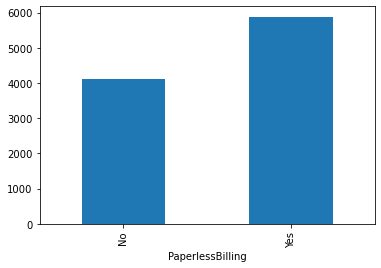

In [159]:
churn_df.groupby('PaperlessBilling').size().plot.bar()

<AxesSubplot:xlabel='PaymentMethod'>

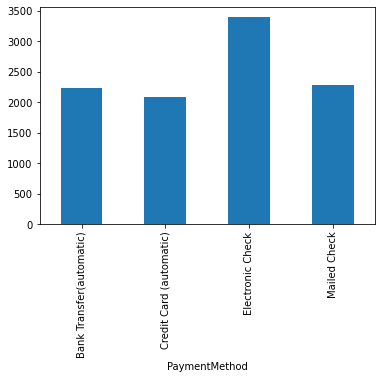

In [160]:
churn_df.groupby('PaymentMethod').size().plot.bar()

**Creating dummy variables for Yes/No categorical variables before visualizing bivariate statistics**

In [161]:
churn_df.dtypes

Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [162]:
churn_df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


**Encoding binary categorical columns as numeric**

In [163]:
binary_columns = ['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','PaperlessBilling']
binary_dict = {'Yes':1,'No':0}
for col in binary_columns:
    churn_df[col] = churn_df[col].replace(binary_dict)
print(churn_df.head())

   Children  Age    Income    Marital  Gender  Churn  Outage_sec_perweek  \
0         0   68  28561.99    Widowed    Male      0            7.978323   
1         1   27  21704.77    Married  Female      1           11.699080   
2         4   50   9609.57    Widowed  Female      0           10.752800   
3         1   48  18925.23    Married    Male      0           14.913540   
4         0   83  40074.19  Separated    Male      1            8.147417   

   Email  Contacts  Yearly_equip_failure  Techie        Contract  Port_modem  \
0     10         0                     1       0        One year           1   
1     12         0                     1       1  Month-to-month           0   
2      9         0                     1       1        Two Year           1   
3     15         2                     0       1        Two Year           0   
4     16         2                     1       0  Month-to-month           1   

   Tablet InternetService  Phone  Multiple  OnlineSecurity  On

**Replacing spaces with underscores within remaining categorical columns**

In [164]:
churn_df['Contract']=churn_df['Contract'].str.replace(' ','_')
churn_df['InternetService']=churn_df['InternetService'].str.replace(' ','_')
churn_df['PaymentMethod']=churn_df['PaymentMethod'].str.replace(' ','_')
#Ensuring spaces were removed
churn_df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One_year,1,1,Fiber_Optic,1,0,1,1,0,0,0,1,1,Credit_Card_(automatic),6.795513,172.455519,904.536110
1,1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber_Optic,1,1,1,0,0,0,1,1,1,Bank_Transfer(automatic),1.156681,242.632554,800.982766
2,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two_Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit_Card_(automatic),15.754144,159.947583,2054.706961
3,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two_Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed_Check,17.087227,119.956840,2164.579412
4,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber_Optic,0,0,0,0,0,1,1,0,0,Mailed_Check,1.670972,149.948316,271.493436


**Using one-hot encoding for the columns: Marital, Contract, Internet Service and Payment Method:**

In [165]:
x1=['Marital','Gender','Contract','InternetService','PaymentMethod']
churn_df=pd.get_dummies(churn_df, prefix=x1, prefix_sep='_', dummy_na=False, columns=x1)

**Viewing column names after encoding and ensuring all data types are now numeric:**

In [166]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Children                                10000 non-null  int64  
 1   Age                                     10000 non-null  int64  
 2   Income                                  10000 non-null  float64
 3   Churn                                   10000 non-null  int64  
 4   Outage_sec_perweek                      10000 non-null  float64
 5   Email                                   10000 non-null  int64  
 6   Contacts                                10000 non-null  int64  
 7   Yearly_equip_failure                    10000 non-null  int64  
 8   Techie                                  10000 non-null  int64  
 9   Port_modem                              10000 non-null  int64  
 10  Tablet                                  10000 non-null  int

Previewing dataframe after encoding

In [167]:
churn_df.head(5)

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Month-to-month,Contract_One_year,Contract_Two_Year,InternetService_DSL,InternetService_Fiber_Optic,InternetService_None,PaymentMethod_Bank_Transfer(automatic),PaymentMethod_Credit_Card_(automatic),PaymentMethod_Electronic_Check,PaymentMethod_Mailed_Check
0,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
2,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0
3,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1


#### Bivariate Statistics

Visualizing Bivariate Statistics

<AxesSubplot:xlabel='Age', ylabel='Churn'>

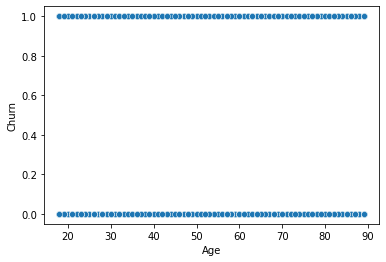

In [168]:
sns.scatterplot(x=churn_df['Age'], y=churn_df['Churn'])

<AxesSubplot:xlabel='Income', ylabel='Churn'>

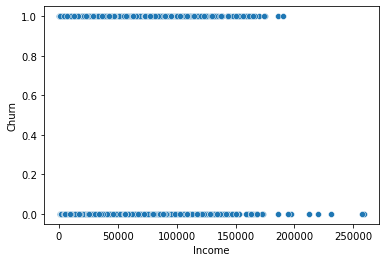

In [169]:
sns.scatterplot(x=churn_df['Income'], y=churn_df['Churn'])

<AxesSubplot:xlabel='Children', ylabel='Churn'>

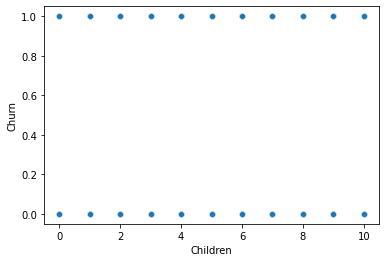

In [170]:
sns.scatterplot(x=churn_df['Children'], y=churn_df['Churn'])

<AxesSubplot:xlabel='Churn'>

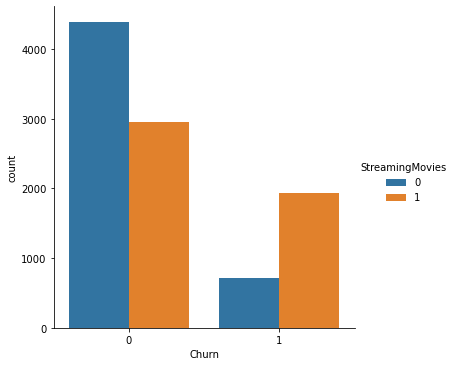

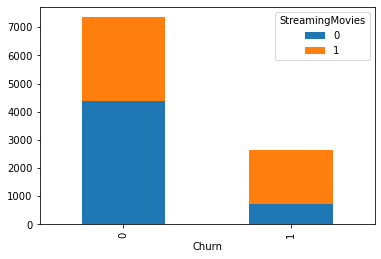

In [171]:
sns.catplot(x='Churn', hue='StreamingMovies', kind = 'count',data=churn_df)

tbl=pd.pivot_table(churn_df.groupby(["Churn","StreamingMovies"]).size().reset_index(), 
                   values=0, index="Churn", columns=["StreamingMovies"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

Interestingly, those who streamed movies were more likely to churn.

<AxesSubplot:xlabel='Churn'>

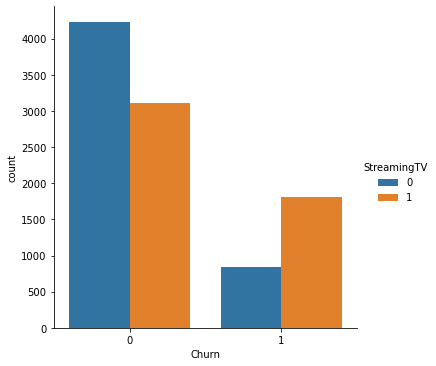

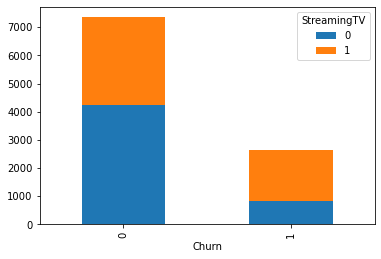

In [172]:
sns.catplot(x='Churn', hue='StreamingTV', kind = 'count',data=churn_df)

tbl=pd.pivot_table(churn_df.groupby(["Churn","StreamingTV"]).size().reset_index(), 
                   values=0, index="Churn", columns=["StreamingTV"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Churn'>

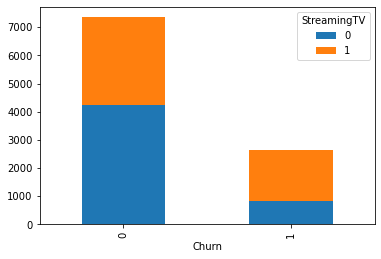

In [173]:
tbl=pd.pivot_table(churn_df.groupby(["Churn","StreamingTV"]).size().reset_index(), 
                   values=0, index="Churn", columns=["StreamingTV"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

Similarly, those who did stream TV were more likely to churn. Streaming could be an area for further data analysis, as it could possibly be a factor in customer churn.

<AxesSubplot:xlabel='Churn'>

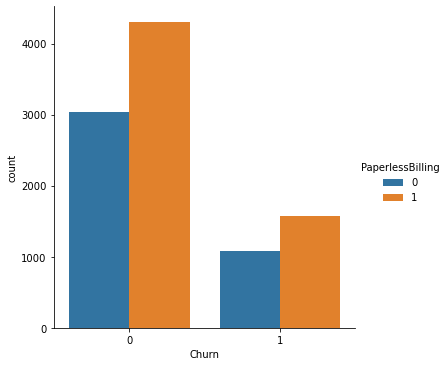

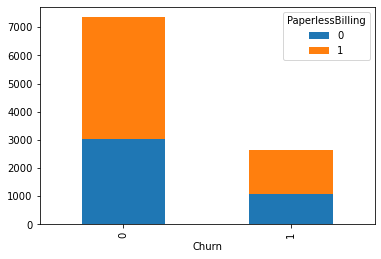

In [174]:
sns.catplot(x='Churn', hue='PaperlessBilling', kind = 'count',data=churn_df)

tbl=pd.pivot_table(churn_df.groupby(["Churn","PaperlessBilling"]).size().reset_index(), 
                   values=0, index="Churn", columns=["PaperlessBilling"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

Paperless billing does not seem to affect churn.

<AxesSubplot:xlabel='Tenure', ylabel='Churn'>

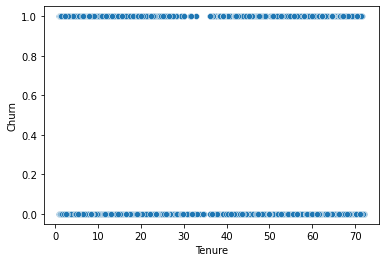

In [175]:
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Churn'])

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Churn'>

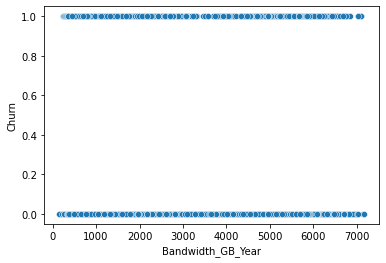

In [176]:
sns.scatterplot(x=churn_df['Bandwidth_GB_Year'], y=churn_df['Churn'])

<AxesSubplot:xlabel='Churn'>

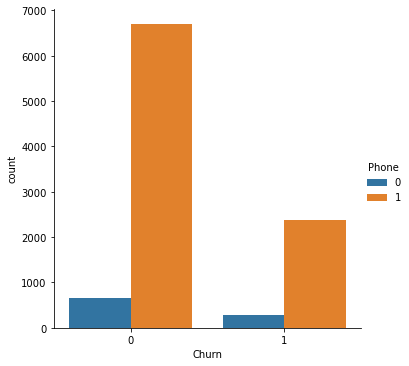

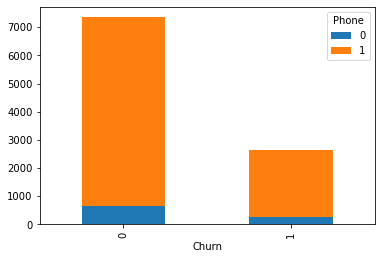

In [177]:
sns.catplot(x='Churn', hue='Phone', kind = 'count',data=churn_df)

tbl=pd.pivot_table(churn_df.groupby(["Churn","Phone"]).size().reset_index(), 
                   values=0, index="Churn", columns=["Phone"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Phone', ylabel='Churn'>

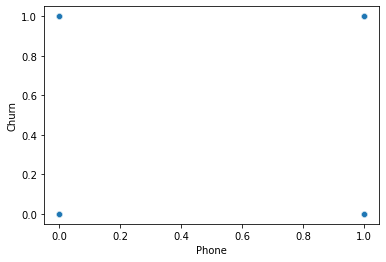

In [178]:
sns.scatterplot(x=churn_df['Phone'], y=churn_df['Churn'])

<AxesSubplot:xlabel='Churn'>

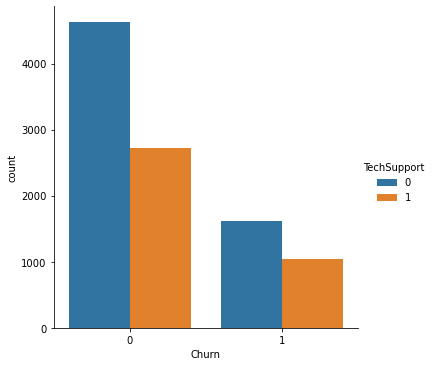

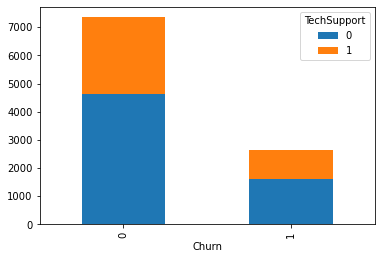

In [179]:
sns.catplot(x='Churn', hue='TechSupport', kind = 'count',data=churn_df)

tbl=pd.pivot_table(churn_df.groupby(["Churn","TechSupport"]).size().reset_index(), 
                   values=0, index="Churn", columns=["TechSupport"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

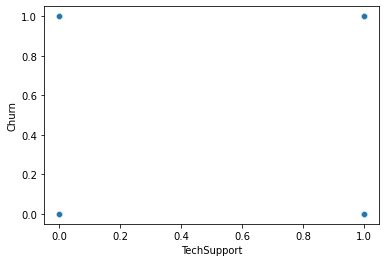

In [180]:
sns.scatterplot(x=churn_df['TechSupport'], y=churn_df['Churn'])

<AxesSubplot:xlabel='Churn'>

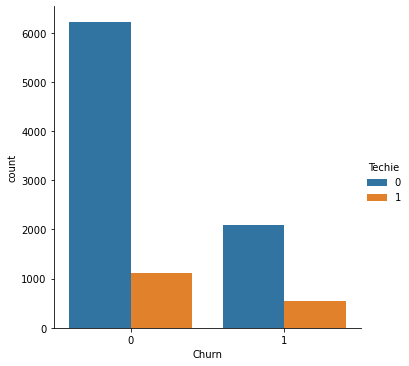

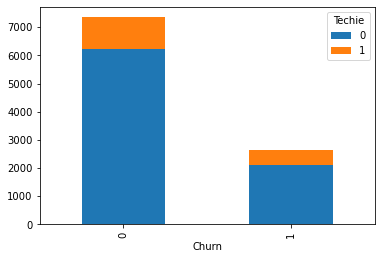

In [181]:
sns.catplot(x='Churn', hue='Techie', kind = 'count',data=churn_df)

tbl=pd.pivot_table(churn_df.groupby(["Churn","Techie"]).size().reset_index(), 
                   values=0, index="Churn", columns=["Techie"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Churn'>

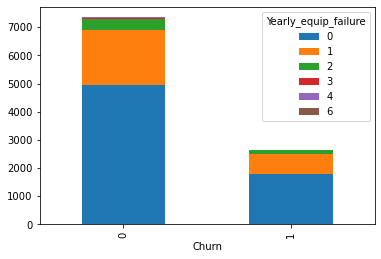

In [182]:
tbl=pd.pivot_table(churn_df.groupby(["Churn","Yearly_equip_failure"]).size().reset_index(), 
                   values=0, index="Churn", columns=["Yearly_equip_failure"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Yearly_equip_failure', ylabel='Churn'>

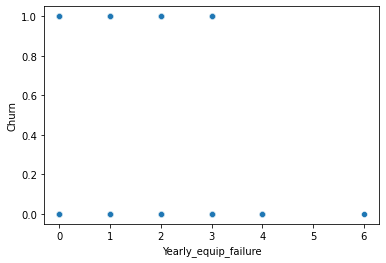

In [183]:
sns.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['Churn'])

**Utilizing SciKit Learn's SelectKBest**

In [184]:
#Assigning all predictor features to X
X = churn_df.drop(["Tenure"],1)
#Assigning Dependent Variable to y
y = churn_df["Tenure"]
print(X.shape)
print(y.shape)

(10000, 40)
(10000,)


In [185]:
feature_names=X.columns
skbest=SelectKBest(score_func=f_classif, k='all')
X_new=skbest.fit_transform(X, y)
X_new.shape

(10000, 40)

In [186]:
# Utilizing P-values to select significant features 
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]
# Print the name of the selected features
features_to_keep

29       Gender_Nonbinary
33    InternetService_DSL
3                   Churn
26        Marital_Widowed
9              Port_modem
21      Bandwidth_GB_Year
Name: Feature, dtype: object

Features to keep have been identified and are listed above. I will now review all columns and drop the features I will not be keeping.

In [187]:
churn_df.columns

Index(['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
       'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'Contract_Month-to-month', 'Contract_One_year',
       'Contract_Two_Year', 'InternetService_DSL',
       'InternetService_Fiber_Optic', 'InternetService_None',
       'PaymentMethod_Bank_Transfer(automatic)',
       'PaymentMethod_Credit_Card_(automatic)',
       'PaymentMethod_Electronic_Check', 'PaymentMethod_Mailed_Check'],
      dtype='object')

In [188]:
churn_df=churn_df.drop(columns=['Children','Age','Income','Outage_sec_perweek','Email',
                                'Contacts','Yearly_equip_failure','Techie','Tablet',
                                'Phone','Multiple','OnlineSecurity','OnlineBackup',
                                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                                'PaperlessBilling','MonthlyCharge','Marital_Divorced',
                                'Marital_Married','Marital_Never Married','Marital_Separated',
                                'Gender_Female', 'Gender_Male','Contract_Month-to-month', 
                                'Contract_One_year','Contract_Two_Year',
                                'InternetService_Fiber_Optic', 'InternetService_None',
                                'PaymentMethod_Bank_Transfer(automatic)',
                                'PaymentMethod_Credit_Card_(automatic)',
                                'PaymentMethod_Mailed_Check','PaymentMethod_Electronic_Check'])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Churn                10000 non-null  int64  
 1   Port_modem           10000 non-null  int64  
 2   Tenure               10000 non-null  float64
 3   Bandwidth_GB_Year    10000 non-null  float64
 4   Marital_Widowed      10000 non-null  uint8  
 5   Gender_Nonbinary     10000 non-null  uint8  
 6   InternetService_DSL  10000 non-null  uint8  
dtypes: float64(2), int64(2), uint8(3)
memory usage: 341.9 KB


### C4. Copy of Prepared Data Set

In [189]:
churn_df.to_csv('churn_prepared_D209_Task2.csv')

## Part IV: Analysis

### D1. Splitting the Data into Training and Testing Data Sets

Code source: (Datacamp, n.d.)

In [190]:
X=churn_df.drop('Tenure', axis=1)
y=churn_df['Tenure']
print('X:',X.shape)
print('y',y.shape)
# Creating training and test sets and setting random state for reproducibility
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=1)
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X: (10000, 6)
y (10000,)
X_train: (8000, 6)
y_train: (8000,)
X_test: (2000, 6)
y_test: (2000,)


**Exporting the training and testing data sets**

In [191]:
X_train.to_csv('D209_Task2_X_train.csv')
X_test.to_csv('D209_Task2_X_test.csv')
y_train.to_csv('D209_Task2_y_train.csv')
y_test.to_csv('D209_Task2_y_test.csv')

### D2. Description of Analysis Technique Used to Appropriately Analyze the Data

Now that all data has been encoded into continuous values and split into training and testing sets, a random forest model will be created and fitted with the training data to make predictions on the test data. 
Parameters will be tuned using hyperparameter tuning and GridSearchCV. 
The best possible score for the model will be determined.
Mean Square Error (MSE), Root Mean Squared Error (RMSE), and R-squared wil be calculated. 
The model will be used to perform a prediction on the test data and an accuracy score will be calculated. 
Finally, the features will be closer evaluated to determine which was most predictive of the random forest model.

### D3. Code Used to Perform the Prediction Analysis

Code source: (Datacamp, n.d.)

In [192]:
rf=RandomForestRegressor(random_state=1)

parameters_rf={"n_estimators":[10, 50, 100], "max_features": [2,3,4], "max_depth": [8, None]}
churn_rf = GridSearchCV(estimator=rf, param_grid=parameters_rf, cv=5, 
                        scoring='neg_mean_squared_error' , verbose=1, n_jobs=-1)
churn_rf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [8, None], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

Determining best model parameters and best model accuracy

In [193]:
print("Best parameters:", churn_rf.best_params_)
print("MSE score on Training Data Set:", churn_rf.best_score_) 
print("RMSE Score on Training Data Set:", (churn_rf.best_score_)**(1/2))
y_train_pred=churn_rf.predict(X_train)
print("R-squared Score on Training Data Set: ",r2_score(y_train,y_train_pred))

Best parameters: {'max_depth': 8, 'max_features': 4, 'n_estimators': 50}
MSE score on Training Data Set: -4.477722778877602
RMSE Score on Training Data Set: nan
R-squared Score on Training Data Set:  0.994600701643273


In [194]:
y_pred=churn_rf.predict(X_test)
print("MSE score on Testing Data Set:", MSE(y_test, y_pred))
print("RMSE Score on Testing Data Set:", (MSE(y_test, y_pred))**(1/2))
y_train_pred=churn_rf.predict(X_train)
print("R-squared Score on Testing Data Set: ",r2_score(y_test,y_pred))

MSE score on Testing Data Set: 4.708542195567782
RMSE Score on Testing Data Set: 2.169917555016269
R-squared Score on Testing Data Set:  0.9933124297068315


Feature Importances

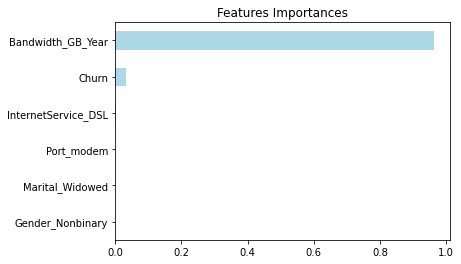

In [195]:
importances=pd.Series(data=churn_rf.best_estimator_.feature_importances_, index=X_train.columns)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='lightblue')
plt.title('Features Importances')
plt.show()

## Part V: Data Summary and Implications

### E1. Accuracy and Mean Squared Error of Prediction Model

The mean squared error (MSE) reflects the average of the total squared difference between the output values and the predicted values; the goal is to get a small MSE as possible (Beheshti, 2020). The MSE on the training dataset was -4.477. The MSE on the testing dataset was 4.7085.
The root mean squared error (RMSE) reflects the distance between the predicted values and the observed values within the dataset. Therefore, the lower the RMSE, the better the model is at fitting a data set (Zach, 2021). The RMSE on the testing data set was approximately 2.1699.
When assessing the accuracy of a model, we also use the r-squared, as this metric indicates how accurately the predictor features explain the variability in teh response variable (Zach, 2021). R-squared ranges between 0 and 1, with 1 indicating a perfectly fit model (Zach, 2021). R-squared on the training dataset was approximately 0.9946, and 0.9933 on the testing dataset. Feature importances were generated and indicated that Bandwidth in gigabytes per year was the most important, followed by churn. 

### E2. Results and Implications of Prediction Analysis

The model's r-squared score of 99.3% on the testing dataset is an excellent score. The root mean squared error for this model is 2.1699.
SelectKBest was utilized for the model's feature selection. The model underwent hyperparameter tuning with GridSearchCV, and it provided the following best parameters for the model: max_depth: 8, max_features: 4, n_estimators: 50. The model could undergo further tuning of its hyperparameters to improve the model's accuracy. Additionally, given additional labeled data the model could be trained and futher improved. 

### E3. One Limitation of the Data Analysis

One limitation of this data analysis is that the dataset is not very large. The dataset only included information for 10,000 customers. If the dataset were larger, provided more customer variables, or provided more data on customers with a longer tenure, the generated model could possibly be more accurate. 

### E4. Recommended Course of Action

Given the model's 99.3% accuracy score, the stakeholders can use this random forest model to predict a customer's tenure.  While the model currently has an excellent accuracy score, the model could undergo further hyperparameter tuning and be provided with additional labeled data to further train and improve the model. The analysis and generated random forest model reveal the company's customers with a higher Bandwidth in gigabytes per year have a higher tenure. The stakeholders could futher explore this feature, as it was the most important feature for predicting tenure.

### Code Sources

Datacamp. (n.d.). Machine learning with tree-based models in python. https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python

Datacamp. (n.d.). Visualizing features importances. https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/bagging-and-random-forests?ex=7

### Additional Sources

Beheshti, N. (2022). *Random forest regression: A basic explanation and use case in 7 minutes.* Towards Data Science.
https://towardsdatascience.com/random-forest-regression-5f605132d19d

Bruce, P., Bruce, A., & Gedeck, P. (2020). *Practical statistics for data scientists : 50+ essential concepts using r and python.* O'Reilly Media, Incorporated.

Larose, C.D., & Larose, D.T. (2019). *Data science using Python and R.* John Wiley & Sons.

Vallisneri, M. (2018). *Python statistics essential training.* LinkedIn Learning.
https://www.linkedin.com/learning/python-statistics-essential-training/the-structure-of-data?u=2045532

Vishalmendekarhere. (2021). *It's all about Assumptions, Pros & Cons.* Medium. 
https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d

Zach. (2021). *RMSE vs r-squared: Which metric should you use?* Statology.
https://www.statology.org/rmse-vs-r-squared